# Mini Project - Investigate Hotel Business using Data Visualization - Muhammad Miftah Thaha

## Import File and Libraries

In [ ]:
!gdown --id 1YgzpD5HowJX0NWHIKu-W4b0_FCtWeGAS

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YgzpD5HowJX0NWHIKu-W4b0_FCtWeGAS
To: /content/hotel_bookings_data.csv
100% 17.1M/17.1M [00:00<00:00, 227MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)

## Stage 1 - Data Pre-Processing

### Load Dataset

In [ ]:
df = pd.read_csv('/content/hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
93524,City Hotel,0,292,2018,September,30,21,0,2,2,...,0,No Deposit,6.0,NaN,0,Family,115.0,0,0,Check-Out
55777,City Hotel,1,5,2018,October,35,21,1,0,2,...,0,Non Refund,NaN,47.0,0,Personal,167.0,0,0,Canceled
59404,City Hotel,1,35,2018,December,44,28,0,2,2,...,0,No Deposit,8.0,NaN,0,Personal,109.0,0,1,Canceled
65115,City Hotel,1,75,2019,May,12,24,2,2,2,...,0,No Deposit,9.0,NaN,0,Personal,100.3,0,0,Canceled
628,Resort Hotel,1,19,2017,September,30,23,1,3,2,...,0,No Deposit,NaN,178.0,0,Personal,139.0,0,0,Canceled


### Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking missing value
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

This dataset have null values, in company, agent, city, and children.

In [ ]:
# Check the unique values
for col in df:
    print('------------------------------')
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('------------------------------', '\n')

------------------------------
Value count kolom hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
------------------------------ 

------------------------------
Value count kolom is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64
------------------------------ 

------------------------------
Value count kolom lead_time:
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64
------------------------------ 

------------------------------
Value count kolom arrival_date_year:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64
------------------------------ 

------------------------------
Value count kolom arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
Jan

In [ ]:
for i in df.columns:
  print('------------------------------')
  print(i,"column's unique values are:",df[i].unique())
  print('------------------------------', '\n')

------------------------------
hotel column's unique values are: ['Resort Hotel' 'City Hotel']
------------------------------ 

------------------------------
is_canceled column's unique values are: [0 1]
------------------------------ 

------------------------------
lead_time column's unique values are: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333

In [ ]:
#separate dtype numeric and string
nums = []
cats = []

for i in df.columns :
    if df[i].dtypes == 'object':
        cats.append(i)
    else :
        nums.append(i)

In [ ]:
df_prep = df.copy()
df_prep.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
16600,Resort Hotel,0,18,2017,October,35,29,2,3,2,...,0,No Deposit,196.0,NaN,0,Personal,143.4,0,1,Check-Out
97658,City Hotel,0,31,2018,November,38,16,1,2,2,...,0,No Deposit,6.0,NaN,0,Family,75.0,0,0,Check-Out
107086,City Hotel,0,137,2019,May,10,6,1,1,2,...,0,No Deposit,37.0,NaN,0,Family,80.0,0,1,Check-Out
37566,Resort Hotel,0,194,2019,August,23,8,4,10,2,...,1,No Deposit,250.0,NaN,0,Personal,153.5,0,0,Check-Out
117777,City Hotel,0,76,2019,October,32,6,2,2,2,...,0,No Deposit,7.0,NaN,0,Personal,98.8,0,1,Check-Out
108288,City Hotel,0,116,2019,May,12,24,0,2,2,...,0,No Deposit,171.0,NaN,0,Family,100.0,0,1,Check-Out
31511,Resort Hotel,0,2,2019,March,4,26,0,2,2,...,1,No Deposit,NaN,NaN,0,Personal,40.5,0,0,Check-Out
54311,City Hotel,1,56,2018,September,29,12,0,3,2,...,0,No Deposit,14.0,NaN,0,Personal,137.7,0,0,Canceled
35756,Resort Hotel,0,76,2019,June,17,29,1,1,2,...,0,No Deposit,240.0,NaN,0,Family,75.0,0,1,Check-Out
104968,City Hotel,0,79,2019,March,4,26,0,1,1,...,1,No Deposit,NaN,365.0,0,Family,85.0,0,0,Check-Out


In [ ]:
#numerical feature
df_prep[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
#categorical feature
df_prep[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


### Handling Missing Values

In [ ]:
df_prep['children'].fillna(0)
df_prep['agent'].fillna(0, inplace = True) 
df_prep['company'].fillna(0, inplace = True)
df_prep['city'].fillna('Unknown', inplace = True)

In [ ]:
#checking missing value
df_prep.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          4
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Handling Odd Values

In [ ]:
df_prep[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,178,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [ ]:
# Check the unique values
for col in cats:
    print('------------------------------')
    print(f'''Value count kolom {col}:''')
    print(df_prep[col].value_counts())
    print('------------------------------', '\n')

------------------------------
Value count kolom hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
------------------------------ 

------------------------------
Value count kolom arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
------------------------------ 

------------------------------
Value count kolom meal:
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64
------------------------------ 

------------------------------
Value count kolom city:
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupa

In [ ]:
df_prep['meal'] = df_prep['meal'].replace({'Undefined':'No Meal'})
df_prep['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [ ]:
#df_prep['market_segment'] = df_prep['market_segment'].replace({'Undefined':'Online TA'})
mode_value = df_prep['market_segment'].mode()[0]
df_prep = df_prep.replace('Undefined', mode_value)
df_prep['market_segment'].value_counts()

Online TA        56479
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: market_segment, dtype: int64

In [ ]:
#df_prep['distribution_channel'] = df_prep['distribution_channel'].replace({'Undefined':'TA/TO'})
mode_value = df_prep['distribution_channel'].mode()[0]
df_prep = df_prep.replace('Undefined', mode_value)
df_prep['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Online TA        5
Name: distribution_channel, dtype: int64

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Handling Unnecessary Values

In [ ]:
df_prep['guests'] = df_prep['adults'] + df_prep['children'] + df_prep['babies']
df_prep['stay_duration'] = df_prep['stays_in_weekend_nights'] + df_prep['stays_in_weekdays_nights']

print('0 Client Guest: {0} out of {1} data'.format(df_prep[df_prep['guests'] == 0].shape[0], df_prep.shape[0]))
print('0 Occupation Night: {0} out of {1} data'.format(df_prep[df_prep['stay_duration'] == 0].shape[0], df_prep.shape[0]))

df_ok = df_prep[(df_prep['guests'] > 0) & (df_prep['stay_duration'] > 0)]

print('Data size before pre-processing: {0} data'.format(df_prep.shape[0]))
print('Data size after pre-processing: {0} data'.format(df_ok.shape[0]))

0 Client Guest: 180 out of 119390 data
0 Occupation Night: 715 out of 119390 data
Data size before pre-processing: 119390 data
Data size after pre-processing: 118561 data


In [ ]:
df_ok.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guests,stay_duration
27594,Resort Hotel,0,103,2018,October,36,30,0,4,2,...,240.0,0.0,0,Personal,198.5,0,3,Check-Out,2.0,4
32996,Resort Hotel,0,4,2019,April,6,11,0,1,2,...,240.0,0.0,0,Personal,68.0,0,1,Check-Out,2.0,1
49581,City Hotel,1,122,2018,June,16,15,0,2,2,...,151.0,0.0,56,Family,85.0,0,0,Canceled,2.0,2
41287,City Hotel,1,0,2017,October,33,14,0,2,2,...,6.0,0.0,0,Family,109.0,0,0,Canceled,2.0,2
101436,City Hotel,0,7,2018,January,46,11,0,1,2,...,0.0,0.0,0,Personal,140.0,0,1,Check-Out,2.0,1


## Exploratory Data Analysis

## Stage 2 - Monthly Hotel Booking Analysis Based on Hotel Type

In [ ]:
df_ok.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'guests', 'stay_duration'],
      dtype='object')

### Agg. Table

In [ ]:
monthly_hotels = df_ok.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year':'nunique', 'reservation_status':'count'}).reset_index()
monthly_hotels.columns = ['hotel', 'month', 'total_year', 'total_reservation']
monthly_hotels

,hotel,month,total_year,total_reservation
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


### Data Normalization (Average Reservation per Year)

In [ ]:
monthly_hotels['avg_reservation'] = round(monthly_hotels['total_reservation'] / monthly_hotels['total_year'])
monthly_hotels

,hotel,month,total_year,total_reservation,avg_reservation
0,City Hotel,April,2,4917,2458.0
1,City Hotel,August,2,7874,3937.0
2,City Hotel,December,2,7554,3777.0
3,City Hotel,February,2,4097,2048.0
4,City Hotel,January,2,4309,2154.0
5,City Hotel,July,2,8184,4092.0
6,City Hotel,June,2,7458,3729.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6411,3206.0
9,City Hotel,November,2,7377,3688.0


### Data Sorting (by Month)

In [ ]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
monthly_hotels['month_num'] = monthly_hotels['month'].map(month_map)
monthly_hotels = monthly_hotels[['hotel', 'month_num', 'month', 'total_year', 'total_reservation', 'avg_reservation']]
monthly_hotels = monthly_hotels.sort_values('month_num').reset_index(drop=True)
monthly_hotels

,hotel,month_num,month,total_year,total_reservation,avg_reservation
0,City Hotel,1,January,2,4309,2154.0
1,Resort Hotel,1,January,2,2403,1202.0
2,City Hotel,2,February,2,4097,2048.0
3,Resort Hotel,2,February,2,2592,1296.0
4,City Hotel,3,March,2,3712,1856.0
5,Resort Hotel,3,March,2,2159,1080.0
6,City Hotel,4,April,2,4917,2458.0
7,Resort Hotel,4,April,2,3081,1540.0
8,Resort Hotel,5,May,2,3305,1652.0
9,City Hotel,5,May,2,6411,3206.0


### Visualization

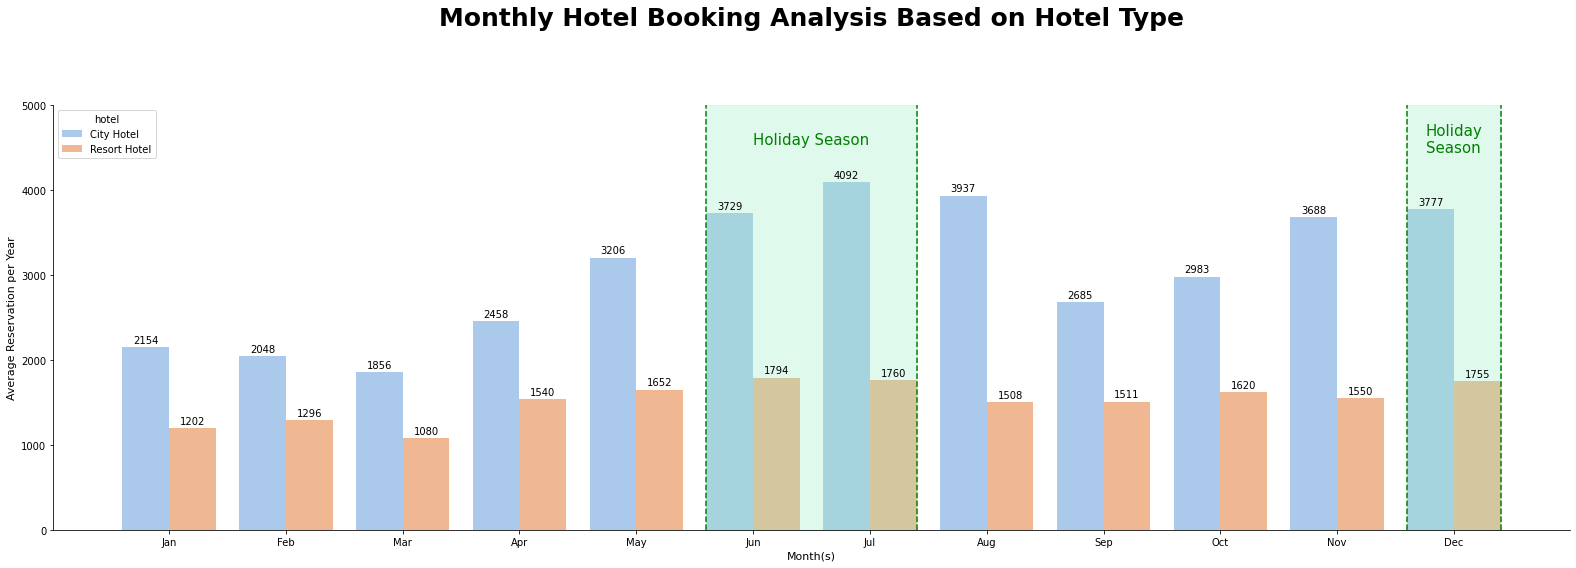

In [ ]:
# Define Visualization
fig, ax = plt.subplots(figsize=(22, 8))
plt.title("Monthly Hotel Booking Analysis Based on Hotel Type", fontsize=25, color='black', weight='bold', pad=80)
sns.barplot(x='month', y='avg_reservation', data=monthly_hotels, hue='hotel', edgecolor='none', palette='pastel')

# Set label in x and y axis
plt.xlabel('Month(s)', fontsize=11)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Reservation per Year', fontsize=11)
plt.ylim(0, 5000)

# Add value label to the bars
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

# Set 1st Holiday Season
plt.axvline(4.6, ls='--', color='green')
plt.axvline(6.4, ls='--', color='green')
plt.stackplot([4.6, 5.6, 6.4], [[5000]], color='#98edc3', alpha=0.3)
plt.text(x=5, y=4600, s='Holiday Season', fontsize=15, color='green', va='center')

# Set 2nd Holiday Season
plt.axvline(10.6, ls='--', color='green')
plt.axvline(11.4, ls='--', color='green')
plt.stackplot([10.6, 11.4], [[5000]], color='#98edc3', alpha=0.3)
plt.text(x=10.76, y=4600, s='Holiday\nSeason', fontsize=15, color='green', va='center')

# Beautify & Save the Viz
sns.despine()
plt.tight_layout()
plt.savefig('Monthly Hotel Booking Analysis Based on Hotel Type.png', dpi=200)

## Stage 3 - Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

### Total Stay Duration on Hotel Type

In [ ]:
df_ok['stay_duration'].value_counts()

2     27630
3     27064
1     21004
4     17373
7      8647
5      7771
6      3846
8      1155
10     1135
14      913
9       840
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: stay_duration, dtype: int64

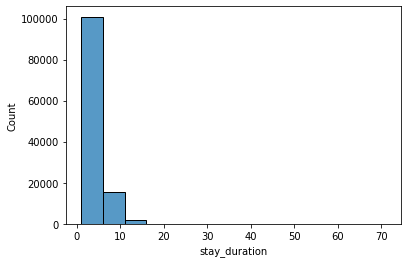

In [ ]:
sns.histplot(data=df_ok, x='stay_duration', binwidth=5);

### Grouping Stay Duration on Hotel Type

In [ ]:
duration = []
for x in df_ok['stay_duration']:
    if x >= 1 and x <= 7:
      week = '1 Week'
    elif x >= 8 and x <= 14:
      week = '2 Week'
    elif x >= 15 and x <= 21:
      week = '3 Week'
    elif x >= 22 and x <= 28:
      week = '4 Week'
    else:
      week = '5+ Week'
    duration.append(week)

df_ok['duration_week'] = duration

<ipython-input-206-0f3b390c4dc9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok['duration_week'] = duration


In [ ]:
df_ok.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guests,stay_duration,duration_week
82699,City Hotel,0,69,2017,February,53,29,2,5,2,...,0.0,0,Contract,92.43,0,0,Check-Out,2.0,7,1 Week
18307,Resort Hotel,0,0,2017,January,47,16,1,0,1,...,16.0,0,Personal,35.00,0,0,Check-Out,1.0,1,1 Week
58537,City Hotel,1,37,2018,December,42,13,0,3,1,...,0.0,0,Family,95.00,0,0,Canceled,1.0,3,1 Week
9874,Resort Hotel,1,40,2019,March,3,16,1,2,1,...,0.0,0,Family,55.00,0,0,Canceled,1.0,3,1 Week
39995,Resort Hotel,0,6,2019,October,35,31,1,3,2,...,0.0,0,Personal,207.50,0,1,Check-Out,3.0,4,1 Week


<Axes: xlabel='duration_week', ylabel='Count'>

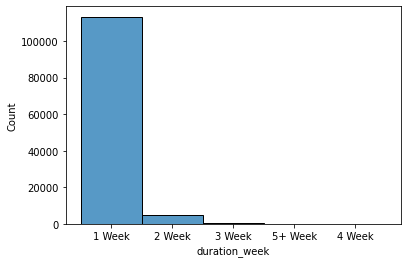

In [ ]:
sns.histplot(df_ok['duration_week'])

### Compare Cancelation Rate with Stay Duration on Hotel Type

In [ ]:
cancel_type = df_ok.groupby(['hotel', 'is_canceled','duration_week']).agg({'reservation_status':'count'}).reset_index()
cancel_type

,hotel,is_canceled,duration_week,reservation_status
0,City Hotel,0,1 Week,45287
1,City Hotel,0,2 Week,511
2,City Hotel,0,3 Week,29
3,City Hotel,0,4 Week,4
4,City Hotel,0,5+ Week,2
5,City Hotel,1,1 Week,32387
6,City Hotel,1,2 Week,558
7,City Hotel,1,3 Week,76
8,City Hotel,1,4 Week,21
9,City Hotel,1,5+ Week,20


In [ ]:
cancel_type = pd.pivot_table(cancel_type,
                             index=['hotel', 'duration_week'],
                             columns='is_canceled',
                             values='reservation_status').reset_index()
cancel_type.columns = ['hotel', 'duration_group', 'stay', 'canceled']
cancel_type['cancel_percentage'] = round((cancel_type['canceled'] / (cancel_type['canceled'] + cancel_type['stay'])) * 100, 3)
cancel_type

,hotel,duration_group,stay,canceled,cancel_percentage
0,City Hotel,1 Week,45287,32387,41.696
1,City Hotel,2 Week,511,558,52.198
2,City Hotel,3 Week,29,76,72.381
3,City Hotel,4 Week,4,21,84.000
4,City Hotel,5+ Week,2,20,90.909
5,Resort Hotel,1 Week,25754,9907,27.781
6,Resort Hotel,2 Week,2650,1078,28.916
7,Resort Hotel,3 Week,90,79,46.746
8,Resort Hotel,4 Week,44,39,46.988
9,Resort Hotel,5+ Week,18,7,28.000


In [ ]:
cancel_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel              10 non-null     object 
 1   duration_group     10 non-null     object 
 2   stay               10 non-null     int64  
 3   canceled           10 non-null     int64  
 4   cancel_percentage  10 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 528.0+ bytes


In [ ]:
cancel_type['duration_num'], _ = pd.factorize(cancel_type['duration_group'])

### Visualization

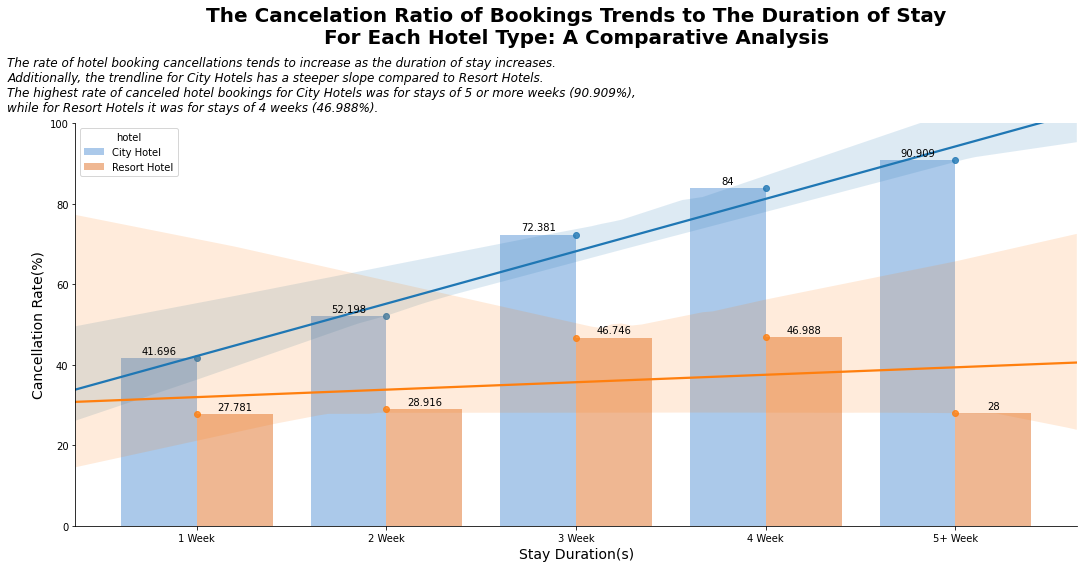

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.title("The Cancelation Ratio of Bookings Trends to The Duration of Stay\nFor Each Hotel Type: A Comparative Analysis", fontsize=20, color='black', weight='bold', pad=80)
plt.text(x=-1, y=103, s="The rate of hotel booking cancellations tends to increase as the duration of stay increases.\nAdditionally, the trendline for City Hotels has a steeper slope compared to Resort Hotels.\nThe highest rate of canceled hotel bookings for City Hotels was for stays of 5 or more weeks (90.909%),\nwhile for Resort Hotels it was for stays of 4 weeks (46.988%).", fontsize=12, fontstyle='italic')
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}, loc='upper left')

sns.barplot(x='duration_group', y='cancel_percentage', data=cancel_type, hue='hotel', edgecolor='none', palette='pastel')
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

sns.regplot(x='duration_num', y='cancel_percentage', data=cancel_type[cancel_type['hotel']=='City Hotel'], label='City Hotel', truncate=False)
sns.regplot(x='duration_num', y='cancel_percentage', data=cancel_type[cancel_type['hotel']=='Resort Hotel'], label='Resort Hotel', truncate=False)

plt.xlabel('Stay Duration(s)',fontsize=14)
plt.ylabel('Cancellation Rate(%)',fontsize=14)
plt.ylim(0, 100)

sns.despine()
plt.tight_layout()
plt.savefig('Trend Hotel.png')

## Stage 4 - Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [ ]:
df_ok['lead_time'].value_counts()

0      6007
1      3384
2      2041
3      1804
4      1697
       ... 
389       1
387       1
400       1
370       1
463       1
Name: lead_time, Length: 478, dtype: int64

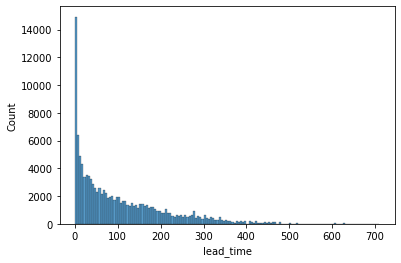

In [ ]:
sns.histplot(data=df_ok, x='lead_time', binwidth=5);

### Grouping Lead Time on Hotel Type

In [ ]:
lead_time_group = []
for x in df_ok['lead_time']:
    if x >= 0 and x <= 30:
      time = '1 Month'
    elif x > 30 and x <= 120:
      time = '2-4 Months'
    elif x > 120 and x <= 210:
      time = '5-7 Months'
    elif x > 210 and x <= 300:
      time = '8-10 Months'
    elif x > 300 and x <= 360:
      time = '11-12 Months'
    else:
      time = '12+ Months'
    lead_time_group.append(time)

df_ok['lead_month'] = lead_time_group

<ipython-input-216-bbab495d2f2e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok['lead_month'] = lead_time_group


In [ ]:
df_ok['lead_month'].value_counts()

2-4 Months      39851
1 Month         38090
5-7 Months      21619
8-10 Months     11122
11-12 Months     4467
12+ Months       3412
Name: lead_month, dtype: int64

In [ ]:
df_ok.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guests,stay_duration,duration_week,lead_month
3943,Resort Hotel,0,103,2018,April,7,9,0,2,2,...,0,Family,50.00,0,0,Check-Out,2.0,2,1 Week,2-4 Months
108838,City Hotel,0,44,2019,May,13,30,0,3,2,...,0,Personal,154.07,0,3,Check-Out,2.0,3,1 Week,2-4 Months
116869,City Hotel,0,33,2019,September,29,16,4,6,1,...,0,Personal,114.20,0,2,Check-Out,1.0,10,2 Week,2-4 Months
13500,Resort Hotel,1,213,2019,October,33,17,2,5,2,...,0,Personal,154.08,0,0,Canceled,3.0,7,1 Week,8-10 Months
43713,City Hotel,0,34,2017,November,39,23,0,3,2,...,33,Family,224.67,0,0,Check-Out,2.0,3,1 Week,2-4 Months


<Axes: xlabel='lead_month', ylabel='Count'>

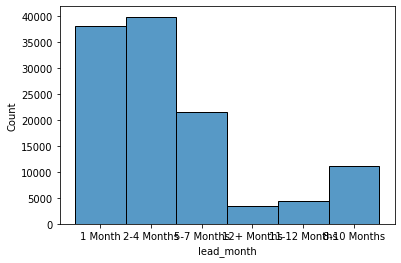

In [ ]:
sns.histplot(df_ok['lead_month'])

### Compare Cancelation Rate With Lead Time on Hotel Type

In [ ]:
cancel_lead = df_ok.groupby(['hotel', 'is_canceled','lead_month']).agg({'reservation_status':'count'}).reset_index()
cancel_lead

,hotel,is_canceled,lead_month,reservation_status
0,City Hotel,0,1 Month,17848
1,City Hotel,0,11-12 Months,731
2,City Hotel,0,12+ Months,790
3,City Hotel,0,2-4 Months,16406
4,City Hotel,0,5-7 Months,7298
5,City Hotel,0,8-10 Months,2760
6,City Hotel,1,1 Month,5170
7,City Hotel,1,11-12 Months,2608
8,City Hotel,1,12+ Months,2074
9,City Hotel,1,2-4 Months,11783


In [ ]:
cancel_lead = pd.pivot_table(cancel_lead,
                             index=['hotel', 'lead_month'],
                             columns='is_canceled',
                             values='reservation_status').reset_index()
cancel_lead.columns = ['hotel', 'lead_group', 'stay', 'canceled']
cancel_lead['cancel_percentage'] = round((cancel_lead['canceled'] / (cancel_lead['canceled'] + cancel_lead['stay'])) * 100, 3)
cancel_lead

,hotel,lead_group,stay,canceled,cancel_percentage
0,City Hotel,1 Month,17848,5170,22.461
1,City Hotel,11-12 Months,731,2608,78.107
2,City Hotel,12+ Months,790,2074,72.416
3,City Hotel,2-4 Months,16406,11783,41.800
4,City Hotel,5-7 Months,7298,7051,49.139
5,City Hotel,8-10 Months,2760,4376,61.323
6,Resort Hotel,1 Month,13096,1976,13.110
7,Resort Hotel,11-12 Months,615,513,45.479
8,Resort Hotel,12+ Months,334,214,39.051
9,Resort Hotel,2-4 Months,7663,3999,34.291


In [ ]:
cancel_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel              12 non-null     object 
 1   lead_group         12 non-null     object 
 2   stay               12 non-null     int64  
 3   canceled           12 non-null     int64  
 4   cancel_percentage  12 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 608.0+ bytes


In [ ]:
#cancel_lead['lead_num'], _ = pd.factorize(cancel_lead['lead_group'])
lead_map = {'1 Month': 0, '2-4 Months': 1, '5-7 Months': 2, '8-10 Months': 3, '11-12 Months': 4, '12+ Months': 5}
hotel_map = {'City Hotel':0, 'Resort Hotel': 1}
cancel_lead['hotel_num'] = cancel_lead['hotel'].map(hotel_map)
cancel_lead['lead_num'] = cancel_lead['lead_group'].map(lead_map)
cancel_lead = cancel_lead.sort_values(by=['hotel_num', 'lead_num']).reset_index(drop=True)
cancel_lead

,hotel,lead_group,stay,canceled,cancel_percentage,hotel_num,lead_num
0,City Hotel,1 Month,17848,5170,22.461,0,0
1,City Hotel,2-4 Months,16406,11783,41.800,0,1
2,City Hotel,5-7 Months,7298,7051,49.139,0,2
3,City Hotel,8-10 Months,2760,4376,61.323,0,3
4,City Hotel,11-12 Months,731,2608,78.107,0,4
5,City Hotel,12+ Months,790,2074,72.416,0,5
6,Resort Hotel,1 Month,13096,1976,13.110,1,0
7,Resort Hotel,2-4 Months,7663,3999,34.291,1,1
8,Resort Hotel,5-7 Months,4585,2685,36.933,1,2
9,Resort Hotel,8-10 Months,2263,1723,43.226,1,3


### Visualization

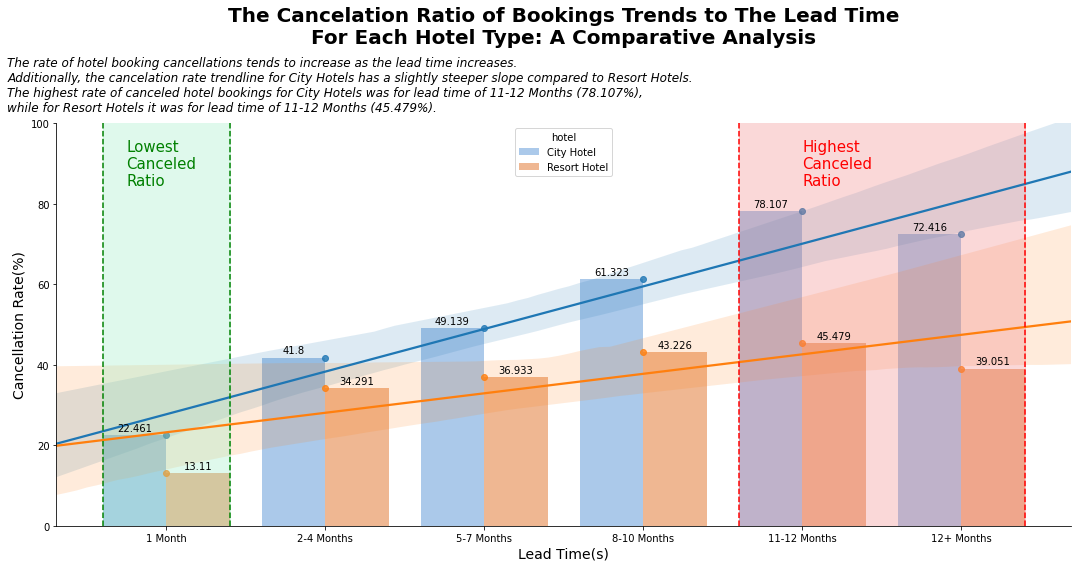

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.title("The Cancelation Ratio of Bookings Trends to The Lead Time\nFor Each Hotel Type: A Comparative Analysis", fontsize=20, color='black', weight='bold', pad=80)
plt.text(x=-1, y=103, s="The rate of hotel booking cancellations tends to increase as the lead time increases.\nAdditionally, the cancelation rate trendline for City Hotels has a slightly steeper slope compared to Resort Hotels.\nThe highest rate of canceled hotel bookings for City Hotels was for lead time of 11-12 Months (78.107%),\nwhile for Resort Hotels it was for lead time of 11-12 Months (45.479%).", fontsize=12, fontstyle='italic')
plt.legend(title_fontsize=15, prop={'size':13}, loc='upper right')

sns.barplot(x='lead_group', y='cancel_percentage', data=cancel_lead, hue='hotel', edgecolor='none', palette='pastel')#, order=['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '12+ Months'])
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

sns.regplot(x='lead_num', y='cancel_percentage', data=cancel_lead[cancel_lead['hotel']=='City Hotel'], label='City Hotel', truncate=False)
sns.regplot(x='lead_num', y='cancel_percentage', data=cancel_lead[cancel_lead['hotel']=='Resort Hotel'], label='Resort Hotel', truncate=False)

# Set 1st Holiday Season
plt.axvline(-0.4, ls='--', color='green')
plt.axvline(0.4, ls='--', color='green')
plt.stackplot([-0.4, 0.4], [[5000]], color='#98edc3', alpha=0.3)
plt.text(x=-0.25, y=90, s='Lowest\nCanceled\nRatio', fontsize=15, color='green', va='center')

# Set 2nd Holiday Season
plt.axvline(3.6, ls='--', color='red')
plt.axvline(5.4, ls='--', color='red')
plt.stackplot([3.6, 5.4], [[5000]], color='#f08080', alpha=0.3)
plt.text(x=4, y=90, s='Highest\nCanceled\nRatio', fontsize=15, color='red', va='center')

plt.xlabel('Lead Time(s)',fontsize=14)
plt.ylabel('Cancellation Rate(%)',fontsize=14)
plt.ylim(0, 100)

sns.despine()
plt.tight_layout()
plt.savefig('Trend Hotel 2.png')